# Capstone Webscrapping using BeautifulSoup

(Please insert the background here )



This project aims to answer and visualize the currency exchange graph of Jpy to Idr.In this notebook the steps and method will be presented; finding the `identifier`, data wrangling and visualization. 

This following requirement are the prerequisites to run webscrapping:
- Install `beautifulSoup4`
- Install `pandas`
- Install `flask`
- Install `matplotlib`


dateparser provides modules to easily parse localized dates in almost any string formats commonly found on web pages.

In [17]:
!pip install dateparser

Before getting a request from the website, we should import `requests` first. Then, get the request to the website using `requests.get()`

In [18]:
import requests
import dateparser
url_get = requests.get('https://news.mifx.com/kurs-valuta-asing?kurs=JPY')

When the request work , we can see use `.content`. Then, slice it to get better visualization of html code from the page and we can also see full of html code.

In [19]:
url_get.content[1:1000]

b'!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta http-equiv="Content-Language" content="en,in" />\n<link rel="alternate" href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" />\n<base href="https://news.mifx.com/" target="_self" />\n<title>Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini</title>\n<meta property="og:title" content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" />\n<meta name="description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta property="og:description" content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " />\n<meta name="keywords" content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," />\n<meta property="og:image" content="favicon.jpg?v=1570462055" />\n\n<meta name="author" content=

In the code below we use beatifulsoup to extract a bunch of html line codes into something readible and structured.

In [20]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


To peek the html that we run, we can do printing equal to 1000 characters

In [21]:
print(soup.prettify()[:1000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini" property="og:title"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " name="description"/>
  <meta content="Nilai tukar rupiah terhadap dollar hari ini berdasarkan kurs tengah Bank Indonesia. " property="og:description"/>
  <meta content="Broker Terbaik, Trading Forex, Trading Teregulasi, Trading Online, Monex, mifx," name="keywords"/>
  <meta content="favicon.jpg?v=1570462055" property="og:image"/>
  <meta content="Ultimaen

In this step we need to find key tags and put the key into `.find()`  To find the key from the website, we should use inspecte element html from our browser. Select any particular information from the webpage, then see the tags such as `div`, `span` or `class`.

In out project  we are going to get an information from `mifx.com`. So, after we inspect html we found `table` with `attrs={'class':'centerText newsTable2'}` to extract the information we want. 




In [22]:
table = soup.find('table',attrs={'class':'centerText newsTable2'})
print(table.prettify()[1:500])

table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colorWhite fontsize14 firstRow">
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   19 Agustus 2020
  </td>
  <td>
   140,95
  </td>
  <td>
   139,50
  </td>
 </tr>
 <tr>
  <td>
   18 Agustus 2020
  </td>
  <td>
   141,80
  </td>
  <td>
   140,37
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   14 Agustus 2020
  </td>
  <td>
   140,


Using find_all to get all the information from html which is located in `tr` tag.


In [23]:
tr = table.find_all('tr')
tr

[<tr class="colorWhite fontsize14 firstRow">
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>19 Agustus 2020</td>
 <td>140,95</td>
 <td>139,50</td>
 </tr>,
 <tr>
 <td>18 Agustus 2020</td>
 <td>141,80</td>
 <td>140,37</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>14 Agustus 2020</td>
 <td>140,19</td>
 <td>138,78</td>
 </tr>,
 <tr>
 <td>13 Agustus 2020</td>
 <td>140,09</td>
 <td>138,68</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>12 Agustus 2020</td>
 <td>139,25</td>
 <td>137,85</td>
 </tr>]


The function below is used to convert selected object into a list


In [24]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]

    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip()

    ask = row.find_all('td')[1].text
    ask = ask.strip()

    bid = row.find_all('td')[2].text
    bid = bid.strip()
    #scrapping process
    temp.append((tanggal,ask,bid))
temp 

[('19\xa0Agustus\xa02020', '140,95', '139,50'),
 ('18\xa0Agustus\xa02020', '141,80', '140,37'),
 ('14\xa0Agustus\xa02020', '140,19', '138,78'),
 ('13\xa0Agustus\xa02020', '140,09', '138,68'),
 ('12\xa0Agustus\xa02020', '139,25', '137,85')]

In this part we finally establish our dataframe where we use `colums` to tidy up information into a table.

In [25]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Date','Ask','Bid'))
df.head()

,Date,Ask,Bid
0,19 Agustus 2020,"140,95","139,50"
1,18 Agustus 2020,"141,80","140,37"
2,14 Agustus 2020,"140,19","138,78"
3,13 Agustus 2020,"140,09","138,68"
4,12 Agustus 2020,"139,25","137,85"


Here we cleanse the data by using data wrangling. 

`'Date' into 'datetime64'`|
`'Ask' and 'Bid' into 'float64'`

In [26]:
df['Bid'] = df['Bid'].apply(lambda x: x.replace(',', '.'))
df['Ask'] = df['Ask'].apply(lambda x: x.replace(',', '.'))

In [27]:
df['Date'] = df['Date'].apply(dateparser.parse)
df[['Ask','Bid']] = df[['Ask','Bid']].astype('float64')

In [28]:
df['Date'] = pd.to_datetime(df['Date'],format=('%d-%m-%y'))

In [29]:
df.dtypes

Date    datetime64[ns]
Ask            float64
Bid            float64
dtype: object

In [30]:
df


,Date,Ask,Bid
0,2020-08-19,140.95,139.50
1,2020-08-18,141.80,140.37
2,2020-08-14,140.19,138.78
3,2020-08-13,140.09,138.68
4,2020-08-12,139.25,137.85


The code below is used to visualize the currency exchange between jpy to idr. Whereby the x axis is set to `date` by using `set_index`.

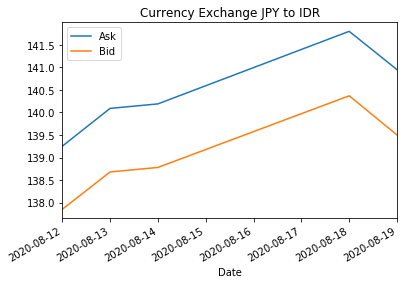

In [31]:
df.set_index('Date').plot(title='Currency Exchange JPY to IDR')

From the plot visualization we could conclude that the `ask` price is always higter than the `bid` price. Furthermore, we could also see that there is a proportional relationship between `ask` and `price`, whereby as the `ask` increases so does the `price` graph and vice versa. We can also see that the lowest point is on 12 august with a steady increase untill it reaches it's highest point on the 18th of august.Nonetheless, on the 19th of august we see a downward slope in the graph.